# DonorsChoose

<p>
DonorsChoose.org receives hundreds of thousands of project proposals each year for classroom projects in need of funding. Right now, a large number of volunteers is needed to manually screen each submission before it's approved to be posted on the DonorsChoose.org website.
</p>
<p>
    Next year, DonorsChoose.org expects to receive close to 500,000 project proposals. As a result, there are three main problems they need to solve:
<ul>
<li>
    How to scale current manual processes and resources to screen 500,000 projects so that they can be posted as quickly and as efficiently as possible</li>
    <li>How to increase the consistency of project vetting across different volunteers to improve the experience for teachers</li>
    <li>How to focus volunteer time on the applications that need the most assistance</li>
    </ul>
</p>    
<p>
The goal of the competition is to predict whether or not a DonorsChoose.org project proposal submitted by a teacher will be approved, using the text of project descriptions as well as additional metadata about the project, teacher, and school. DonorsChoose.org can then use this information to identify projects most likely to need further review before approval.
</p>

## About the DonorsChoose Data Set

The `train.csv` data set provided by DonorsChoose contains the following features:

Feature | Description 
----------|---------------
**`project_id`** | A unique identifier for the proposed project. **Example:** `p036502`   
**`project_title`**    | Title of the project. **Examples:**<br><ul><li><code>Art Will Make You Happy!</code></li><li><code>First Grade Fun</code></li></ul> 
**`project_grade_category`** | Grade level of students for which the project is targeted. One of the following enumerated values: <br/><ul><li><code>Grades PreK-2</code></li><li><code>Grades 3-5</code></li><li><code>Grades 6-8</code></li><li><code>Grades 9-12</code></li></ul>  
 **`project_subject_categories`** | One or more (comma-separated) subject categories for the project from the following enumerated list of values:  <br/><ul><li><code>Applied Learning</code></li><li><code>Care &amp; Hunger</code></li><li><code>Health &amp; Sports</code></li><li><code>History &amp; Civics</code></li><li><code>Literacy &amp; Language</code></li><li><code>Math &amp; Science</code></li><li><code>Music &amp; The Arts</code></li><li><code>Special Needs</code></li><li><code>Warmth</code></li></ul><br/> **Examples:** <br/><ul><li><code>Music &amp; The Arts</code></li><li><code>Literacy &amp; Language, Math &amp; Science</code></li>  
  **`school_state`** | State where school is located ([Two-letter U.S. postal code](https://en.wikipedia.org/wiki/List_of_U.S._state_abbreviations#Postal_codes)). **Example:** `WY`
**`project_subject_subcategories`** | One or more (comma-separated) subject subcategories for the project. **Examples:** <br/><ul><li><code>Literacy</code></li><li><code>Literature &amp; Writing, Social Sciences</code></li></ul> 
**`project_resource_summary`** | An explanation of the resources needed for the project. **Example:** <br/><ul><li><code>My students need hands on literacy materials to manage sensory needs!</code</li></ul> 
**`project_essay_1`**    | First application essay<sup>*</sup>  
**`project_essay_2`**    | Second application essay<sup>*</sup> 
**`project_essay_3`**    | Third application essay<sup>*</sup> 
**`project_essay_4`**    | Fourth application essay<sup>*</sup> 
**`project_submitted_datetime`** | Datetime when project application was submitted. **Example:** `2016-04-28 12:43:56.245`   
**`teacher_id`** | A unique identifier for the teacher of the proposed project. **Example:** `bdf8baa8fedef6bfeec7ae4ff1c15c56`  
**`teacher_prefix`** | Teacher's title. One of the following enumerated values: <br/><ul><li><code>nan</code></li><li><code>Dr.</code></li><li><code>Mr.</code></li><li><code>Mrs.</code></li><li><code>Ms.</code></li><li><code>Teacher.</code></li></ul>  
**`teacher_number_of_previously_posted_projects`** | Number of project applications previously submitted by the same teacher. **Example:** `2` 

<sup>*</sup> See the section <b>Notes on the Essay Data</b> for more details about these features.

Additionally, the `resources.csv` data set provides more data about the resources required for each project. Each line in this file represents a resource required by a project:

Feature | Description 
----------|---------------
**`id`** | A `project_id` value from the `train.csv` file.  **Example:** `p036502`   
**`description`** | Desciption of the resource. **Example:** `Tenor Saxophone Reeds, Box of 25`   
**`quantity`** | Quantity of the resource required. **Example:** `3`   
**`price`** | Price of the resource required. **Example:** `9.95`   

**Note:** Many projects require multiple resources. The `id` value corresponds to a `project_id` in train.csv, so you use it as a key to retrieve all resources needed for a project:

The data set contains the following label (the value you will attempt to predict):

Label | Description
----------|---------------
`project_is_approved` | A binary flag indicating whether DonorsChoose approved the project. A value of `0` indicates the project was not approved, and a value of `1` indicates the project was approved.

### Notes on the Essay Data

<ul>
Prior to May 17, 2016, the prompts for the essays were as follows:
<li>__project_essay_1:__ "Introduce us to your classroom"</li>
<li>__project_essay_2:__ "Tell us more about your students"</li>
<li>__project_essay_3:__ "Describe how your students will use the materials you're requesting"</li>
<li>__project_essay_3:__ "Close by sharing why your project will make a difference"</li>
</ul>


<ul>
Starting on May 17, 2016, the number of essays was reduced from 4 to 2, and the prompts for the first 2 essays were changed to the following:<br>
<li>__project_essay_1:__ "Describe your students: What makes your students special? Specific details about their background, your neighborhood, and your school are all helpful."</li>
<li>__project_essay_2:__ "About your project: How will these materials make a difference in your students' learning and improve their school lives?"</li>
<br>For all projects with project_submitted_datetime of 2016-05-17 and later, the values of project_essay_3 and project_essay_4 will be NaN.
</ul>


In [91]:
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

import sqlite3
import pandas as pd
import numpy as np
import nltk
import string
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from nltk.stem.porter import PorterStemmer

import re
# Tutorial about Python regular expressions: https://pymotw.com/2/re/
import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer

from gensim.models import Word2Vec
from gensim.models import KeyedVectors
import pickle

from tqdm import tqdm
import os

from plotly import plotly
import plotly.offline as offline
import plotly.graph_objs as go
offline.init_notebook_mode()
from collections import Counter

## 1.1 Reading Data

In [92]:
project_data = pd.read_csv('train_data.csv')
resource_data = pd.read_csv('resources.csv')

In [93]:
print("Number of data points in train data", project_data.shape)
print('-'*50)
print("The attributes of data :", project_data.columns.values)

Number of data points in train data (109248, 17)
--------------------------------------------------
The attributes of data : ['Unnamed: 0' 'id' 'teacher_id' 'teacher_prefix' 'school_state'
 'project_submitted_datetime' 'project_grade_category'
 'project_subject_categories' 'project_subject_subcategories'
 'project_title' 'project_essay_1' 'project_essay_2' 'project_essay_3'
 'project_essay_4' 'project_resource_summary'
 'teacher_number_of_previously_posted_projects' 'project_is_approved']


In [94]:
print("Number of data points in train data", resource_data.shape)
print(resource_data.columns.values)
resource_data.head(2)

Number of data points in train data (1541272, 4)
['id' 'description' 'quantity' 'price']


id                                        description  quantity  \
0  p233245  LC652 - Lakeshore Double-Space Mobile Drying Rack         1   
1  p069063        Bouncy Bands for Desks (Blue support pipes)         3   

    price  
0  149.00  
1   14.95

In [95]:
# https://stackoverflow.com/questions/22407798/how-to-reset-a-dataframes-indexes-for-all-groups-in-one-step
price_data = resource_data.groupby('id').agg({'price':'sum', 'quantity':'sum'}).reset_index()

# join two dataframes in python: 
project_data = pd.merge(project_data, price_data, on='id', how='left')

In [96]:
project_data = project_data.sample(frac=0.5)

## 1.2 preprocessing of `project_subject_categories`

In [97]:
catogories = list(project_data['project_subject_categories'].values)
# remove special characters from list of strings python: https://stackoverflow.com/a/47301924/4084039

# https://www.geeksforgeeks.org/removing-stop-words-nltk-python/
# https://stackoverflow.com/questions/23669024/how-to-strip-a-specific-word-from-a-string
# https://stackoverflow.com/questions/8270092/remove-all-whitespace-in-a-string-in-python
cat_list = []
for i in catogories:
    temp = ""
    # consider we have text like this "Math & Science, Warmth, Care & Hunger"
    for j in i.split(','): # it will split it in three parts ["Math & Science", "Warmth", "Care & Hunger"]
        if 'The' in j.split(): # this will split each of the catogory based on space "Math & Science"=> "Math","&", "Science"
            j=j.replace('The','') # if we have the words "The" we are going to replace it with ''(i.e removing 'The')
        j = j.replace(' ','') # we are placeing all the ' '(space) with ''(empty) ex:"Math & Science"=>"Math&Science"
        temp+=j.strip()+" " #" abc ".strip() will return "abc", remove the trailing spaces
        temp = temp.replace('&','_') # we are replacing the & value into 
    cat_list.append(temp.strip())
    
project_data['clean_categories'] = cat_list
project_data.drop(['project_subject_categories'], axis=1, inplace=True)

from collections import Counter
my_counter = Counter()
for word in project_data['clean_categories'].values:
    my_counter.update(word.split())

cat_dict = dict(my_counter)
sorted_cat_dict = dict(sorted(cat_dict.items(), key=lambda kv: kv[1]))


## 1.3 preprocessing of `project_subject_subcategories`

In [98]:
sub_catogories = list(project_data['project_subject_subcategories'].values)
# remove special characters from list of strings python: https://stackoverflow.com/a/47301924/4084039

# https://www.geeksforgeeks.org/removing-stop-words-nltk-python/
# https://stackoverflow.com/questions/23669024/how-to-strip-a-specific-word-from-a-string
# https://stackoverflow.com/questions/8270092/remove-all-whitespace-in-a-string-in-python

sub_cat_list = []
for i in sub_catogories:
    temp = ""
    # consider we have text like this "Math & Science, Warmth, Care & Hunger"
    for j in i.split(','): # it will split it in three parts ["Math & Science", "Warmth", "Care & Hunger"]
        if 'The' in j.split(): # this will split each of the catogory based on space "Math & Science"=> "Math","&", "Science"
            j=j.replace('The','') # if we have the words "The" we are going to replace it with ''(i.e removing 'The')
        j = j.replace(' ','') # we are placeing all the ' '(space) with ''(empty) ex:"Math & Science"=>"Math&Science"
        temp +=j.strip()+" "#" abc ".strip() will return "abc", remove the trailing spaces
        temp = temp.replace('&','_')
    sub_cat_list.append(temp.strip())

project_data['clean_subcategories'] = sub_cat_list
project_data.drop(['project_subject_subcategories'], axis=1, inplace=True)

# count of all the words in corpus python: https://stackoverflow.com/a/22898595/4084039
my_counter = Counter()
for word in project_data['clean_subcategories'].values:
    my_counter.update(word.split())
    
sub_cat_dict = dict(my_counter)
sorted_sub_cat_dict = dict(sorted(sub_cat_dict.items(), key=lambda kv: kv[1]))

## 1.3 Text preprocessing

In [99]:
# merge two column text dataframe: 
project_data["essay"] = project_data["project_essay_1"].map(str) +\
                        project_data["project_essay_2"].map(str) + \
                        project_data["project_essay_3"].map(str) + \
                        project_data["project_essay_4"].map(str)

In [100]:
project_data.head(2)

Unnamed: 0       id                        teacher_id teacher_prefix  \
29477      116228  p069745  da37fb4e6e05fbbaa6374ba16b61818b           Mrs.   
57009      125646  p114346  e092bd8d57623b0fb49b855ca5579063            Ms.   

      school_state project_submitted_datetime project_grade_category  \
29477           NY        2017-03-24 09:59:07             Grades 3-5   
57009           NY        2017-02-14 07:53:33          Grades PreK-2   

                project_title  \
29477    Owl Pellets, really?   
57009  Having A Ball In P.E.!   

                                         project_essay_1  \
29477  My students are very diverse. They are also di...   
57009  My students are part of the Girls Prep LESES. ...   

                                         project_essay_2 project_essay_3  \
29477  My students will be able to use the owl pellet...             NaN   
57009  It is important for students to have the oppor...             NaN   

      project_essay_4                           project_resource_summary  \
29477             NaN  My students need large owl pellets and Learnit...   
57009             NaN  My students need a variety of different ball t...   

       teacher_number_of_previously_posted_projects  project_is_approved  \
29477                                            39                    1   
57009                                             2                    1   

        price  quantity           clean_categories  \
29477  104.40        24  Math_Science SpecialNeeds   
57009  180.25         9              Health_Sports   

                     clean_subcategories  \
29477  EnvironmentalScience SpecialNeeds   
57009        Gym_Fitness Health_Wellness   

                                                   essay  
29477  My students are very diverse. They are also di...  
57009  My students are part of the Girls Prep LESES. ...

In [101]:
#### 1.4.2.3 Using Pretrained Models: TFIDF weighted W2V

In [102]:
# printing some random reviews
print(project_data['essay'].values[0])
print("="*50)
print(project_data['essay'].values[150])
print("="*50)
print(project_data['essay'].values[1000])
print("="*50)
print(project_data['essay'].values[20000])
print("="*50)
# print(project_data['essay'].values[99999])
# print("="*50)

My students are very diverse. They are also diverse learners and they come from diverse backgrounds. I have students with disabilities, students from other countries that are learning English as well as advanced students. It is quite an interesting group of kids. \r\nMy students are awesome kids who come in every day and are eager to learn despite the challenges they may face. It is very inspiring and although it is very challenging, I am lucky to be their teacher.My students will be able to use the owl pellets to gain more knowledge about owls and food chains. They will be able to experience and understand for themselves what owls eat by dissecting the owl pellets. Hopefully, we will find a mouse skull and a variety of little bones to really bring the food chain to life. The Active Learning Stools will help to keep them stay focused throughout the day. I have a couple of these stools in my classroom and they are wonderful, it makes a world of difference to have alternate seating optio

In [103]:
# https://stackoverflow.com/a/47091490/4084039
import re

def decontracted(phrase):
    # specific
    phrase = re.sub(r"won't", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)

    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase

In [104]:
sent = decontracted(project_data['essay'].values[20000])
print(sent)
print("="*50)

Imagine walking into a building where everyone knows your name and your story. That is what makes my school special and unique. \r\n\r\nOur school district is a growing 4K-grade 8 community with a diversity of students who come from various economic backgrounds. My school celebrates individuality and encourages students to be the best they can be. When you walk into my school, you immediately get a sense of family and that everyone will be your friend. \r\nIt is our goal at my school to meet every child is needs. We strive to use a variety of techniques and resources to do just that.Students are special human beings who have unique needs that can be met through the use of a variety of resources. \r\nI service students who are in grades Kindergarten through grade 8 in the areas of reading and mathematics. Students receive small group instruction during what my school calls \"buzz time\". It is my job to provide instruction to meet their individual needs. \r\nMany of the students I meet 

In [105]:
# \r \n \t remove from string python: http://texthandler.com/info/remove-line-breaks-python/
sent = sent.replace('\\r', ' ')
sent = sent.replace('\\"', ' ')
sent = sent.replace('\\n', ' ')
print(sent)

Imagine walking into a building where everyone knows your name and your story. That is what makes my school special and unique.     Our school district is a growing 4K-grade 8 community with a diversity of students who come from various economic backgrounds. My school celebrates individuality and encourages students to be the best they can be. When you walk into my school, you immediately get a sense of family and that everyone will be your friend.   It is our goal at my school to meet every child is needs. We strive to use a variety of techniques and resources to do just that.Students are special human beings who have unique needs that can be met through the use of a variety of resources.   I service students who are in grades Kindergarten through grade 8 in the areas of reading and mathematics. Students receive small group instruction during what my school calls  buzz time . It is my job to provide instruction to meet their individual needs.   Many of the students I meet with are act

In [106]:
#remove spacial character: https://stackoverflow.com/a/5843547/4084039
sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
print(sent)

Imagine walking into a building where everyone knows your name and your story That is what makes my school special and unique Our school district is a growing 4K grade 8 community with a diversity of students who come from various economic backgrounds My school celebrates individuality and encourages students to be the best they can be When you walk into my school you immediately get a sense of family and that everyone will be your friend It is our goal at my school to meet every child is needs We strive to use a variety of techniques and resources to do just that Students are special human beings who have unique needs that can be met through the use of a variety of resources I service students who are in grades Kindergarten through grade 8 in the areas of reading and mathematics Students receive small group instruction during what my school calls buzz time It is my job to provide instruction to meet their individual needs Many of the students I meet with are active and can at times ha

In [107]:
# https://gist.github.com/sebleier/554280
# we are removing the words from the stop words list: 'no', 'nor', 'not'
stopwords= ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've",\
            "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', \
            'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their',\
            'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', \
            'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', \
            'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', \
            'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after',\
            'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further',\
            'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more',\
            'most', 'other', 'some', 'such', 'only', 'own', 'same', 'so', 'than', 'too', 'very', \
            's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', \
            've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn',\
            "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn',\
            "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", \
            'won', "won't", 'wouldn', "wouldn't"]

In [108]:
# Combining all the above stundents 
from tqdm import tqdm
preprocessed_essays = []
# tqdm is for printing the status bar
for sentance in tqdm(project_data['essay'].values):
    sent = decontracted(sentance)
    sent = sent.replace('\\r', ' ')
    sent = sent.replace('\\"', ' ')
    sent = sent.replace('\\n', ' ')
    sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
    # https://gist.github.com/sebleier/554280
    sent = ' '.join(e for e in sent.split() if e not in stopwords)
    preprocessed_essays.append(sent.lower().strip())

100%|██████████████████████████████████| 54624/54624 [00:41<00:00, 1300.59it/s]


In [109]:
# after preprocesing
preprocessed_essays[20000]

'imagine walking building everyone knows name story that makes school special unique our school district growing 4k grade 8 community diversity students come various economic backgrounds my school celebrates individuality encourages students best when walk school immediately get sense family everyone friend it goal school meet every child needs we strive use variety techniques resources students special human beings unique needs met use variety resources i service students grades kindergarten grade 8 areas reading mathematics students receive small group instruction school calls buzz time it job provide instruction meet individual needs many students i meet active times difficult time focusing work they often move around seats stand table it goal use special seats called hokki stools give students option sit wiggle work this help activity level contribute successful work session i teacher would also appreciate chance improve focus use ball chair tables i work nannan'

<h2><font color='red'> 1.4 Preprocessing of `project_title`</font></h2>

In [110]:
# similarly you can preprocess the titles also
from tqdm import tqdm
preprocessed_titles = []
# tqdm is for printing the status bar
for sentance in tqdm(project_data['project_title'].values):
    sent = decontracted(sentance)
    sent = sent.replace('\\r', ' ')
    sent = sent.replace('\\"', ' ')
    sent = sent.replace('\\n', ' ')
    sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
    # https://gist.github.com/sebleier/554280
    sent = ' '.join(e for e in sent.split() if e.lower() not in stopwords)
    preprocessed_titles.append(sent.lower().strip())
    
preprocessed_titles[1]

100%|█████████████████████████████████| 54624/54624 [00:02<00:00, 26558.77it/s]


'ball p e'

In [111]:
preprocessed_essays[20000]

project_data['clean_essays'] = preprocessed_essays
project_data.drop(['project_essay_1'], axis=1, inplace=True)
project_data.drop(['project_essay_2'], axis=1, inplace=True)
project_data.drop(['project_essay_3'], axis=1, inplace=True)
project_data.drop(['project_essay_4'], axis=1, inplace=True)

In [112]:
project_data['clean_titles'] = preprocessed_titles

In [113]:
project_data.columns

Index(['Unnamed: 0', 'id', 'teacher_id', 'teacher_prefix', 'school_state',
       'project_submitted_datetime', 'project_grade_category', 'project_title',
       'project_resource_summary',
       'teacher_number_of_previously_posted_projects', 'project_is_approved',
       'price', 'quantity', 'clean_categories', 'clean_subcategories', 'essay',
       'clean_essays', 'clean_titles'],
      dtype='object')

## 1.5 Preparing data for models

In [114]:
project_data.columns

Index(['Unnamed: 0', 'id', 'teacher_id', 'teacher_prefix', 'school_state',
       'project_submitted_datetime', 'project_grade_category', 'project_title',
       'project_resource_summary',
       'teacher_number_of_previously_posted_projects', 'project_is_approved',
       'price', 'quantity', 'clean_categories', 'clean_subcategories', 'essay',
       'clean_essays', 'clean_titles'],
      dtype='object')

we are going to consider

       - school_state : categorical data
       - clean_categories : categorical data
       - clean_subcategories : categorical data
       - project_grade_category : categorical data
       - teacher_prefix : categorical data
       
       - project_title : text data
       - text : text data
       - project_resource_summary: text data (optinal)
       
       - quantity : numerical (optinal)
       - teacher_number_of_previously_posted_projects : numerical
       - price : numerical

### 1.5.1 Vectorizing Categorical data

- https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/handling-categorical-and-numerical-features/

In [115]:
# # we use count vectorizer to convert the values into one 
# from sklearn.feature_extraction.text import CountVectorizer
# vectorizer = CountVectorizer(vocabulary=list(sorted_cat_dict.keys()), lowercase=False, binary=True)
# categories_one_hot = vectorizer.fit_transform(project_data['clean_categories'].values)
# print(vectorizer.get_feature_names())
# print("Shape of matrix after one hot encodig ",categories_one_hot.shape)

In [116]:
# # we use count vectorizer to convert the values into one 
# vectorizer = CountVectorizer(vocabulary=list(sorted_sub_cat_dict.keys()), lowercase=False, binary=True)
# sub_categories_one_hot = vectorizer.fit_transform(project_data['clean_subcategories'].values)
# print(vectorizer.get_feature_names())
# print("Shape of matrix after one hot encodig ",sub_categories_one_hot.shape)

In [117]:
# you can do the similar thing with state, teacher_prefix and project_grade_category also

### 1.5.2 Vectorizing Text data

#### 1.5.2.1 Bag of words

In [118]:
# # We are considering only the words which appeared in at least 10 documents(rows or projects).
# vectorizer = CountVectorizer(min_df=10)
# text_bow = vectorizer.fit_transform(preprocessed_essays)
# print("Shape of matrix after one hot encodig ",text_bow.shape)

In [119]:
# you can vectorize the title also 
# before you vectorize the title make sure you preprocess it

#### 1.5.2.2 TFIDF vectorizer

In [120]:
# from sklearn.feature_extraction.text import TfidfVectorizer
# vectorizer = TfidfVectorizer(min_df=10)
# text_tfidf = vectorizer.fit_transform(preprocessed_essays)
# print("Shape of matrix after one hot encodig ",text_tfidf.shape)

#### 1.5.2.3 Using Pretrained Models: Avg W2V

In [121]:
'''
# Reading glove vectors in python: https://stackoverflow.com/a/38230349/4084039
def loadGloveModel(gloveFile):
    print ("Loading Glove Model")
    f = open(gloveFile,'r', encoding="utf8")
    model = {}
    for line in tqdm(f):
        splitLine = line.split()
        word = splitLine[0]
        embedding = np.array([float(val) for val in splitLine[1:]])
        model[word] = embedding
    print ("Done.",len(model)," words loaded!")
    return model
model = loadGloveModel('glove.42B.300d.txt')

# ============================
Output:
    
Loading Glove Model
1917495it [06:32, 4879.69it/s]
Done. 1917495  words loaded!

# ============================

words = []
for i in preproced_texts:
    words.extend(i.split(' '))

for i in preproced_titles:
    words.extend(i.split(' '))
print("all the words in the coupus", len(words))
words = set(words)
print("the unique words in the coupus", len(words))

inter_words = set(model.keys()).intersection(words)
print("The number of words that are present in both glove vectors and our coupus", \
      len(inter_words),"(",np.round(len(inter_words)/len(words)*100,3),"%)")

words_courpus = {}
words_glove = set(model.keys())
for i in words:
    if i in words_glove:
        words_courpus[i] = model[i]
print("word 2 vec length", len(words_courpus))


# stronging variables into pickle files python: http://www.jessicayung.com/how-to-use-pickle-to-save-and-load-variables-in-python/

import pickle
with open('glove_vectors', 'wb') as f:
    pickle.dump(words_courpus, f)


'''

'\n# Reading glove vectors in python: https://stackoverflow.com/a/38230349/4084039\ndef loadGloveModel(gloveFile):\n    print ("Loading Glove Model")\n    f = open(gloveFile,\'r\', encoding="utf8")\n    model = {}\n    for line in tqdm(f):\n        splitLine = line.split()\n        word = splitLine[0]\n        embedding = np.array([float(val) for val in splitLine[1:]])\n        model[word] = embedding\n    print ("Done.",len(model)," words loaded!")\n    return model\nmodel = loadGloveModel(\'glove.42B.300d.txt\')\n\n# ============================\nOutput:\n    \nLoading Glove Model\n1917495it [06:32, 4879.69it/s]\nDone. 1917495  words loaded!\n\n# ============================\n\nwords = []\nfor i in preproced_texts:\n    words.extend(i.split(\' \'))\n\nfor i in preproced_titles:\n    words.extend(i.split(\' \'))\nprint("all the words in the coupus", len(words))\nwords = set(words)\nprint("the unique words in the coupus", len(words))\n\ninter_words = set(model.keys()).intersection(word

In [122]:
# stronging variables into pickle files python: http://www.jessicayung.com/how-to-use-pickle-to-save-and-load-variables-in-python/
# make sure you have the glove_vectors file
with open('glove_vectors', 'rb') as f:
    model = pickle.load(f)
    glove_words =  set(model.keys())

In [123]:
# # average Word2Vec
# # compute average word2vec for each review.
# avg_w2v_vectors = []; # the avg-w2v for each sentence/review is stored in this list
# for sentence in tqdm(preprocessed_essays): # for each review/sentence
#     vector = np.zeros(300) # as word vectors are of zero length
#     cnt_words =0; # num of words with a valid vector in the sentence/review
#     for word in sentence.split(): # for each word in a review/sentence
#         if word in glove_words:
#             vector += model[word]
#             cnt_words += 1
#     if cnt_words != 0:
#         vector /= cnt_words
#     avg_w2v_vectors.append(vector)

# print(len(avg_w2v_vectors))
# print(len(avg_w2v_vectors[0]))

#### 1.5.2.3 Using Pretrained Models: TFIDF weighted W2V

In [124]:
# # S = ["abc def pqr", "def def def abc", "pqr pqr def"]
# tfidf_model = TfidfVectorizer()
# tfidf_model.fit(preprocessed_essays)
# # we are converting a dictionary with word as a key, and the idf as a value
# dictionary = dict(zip(tfidf_model.get_feature_names(), list(tfidf_model.idf_)))
# tfidf_words = set(tfidf_model.get_feature_names())

In [125]:
# # average Word2Vec
# # compute average word2vec for each review.
# tfidf_w2v_vectors = []; # the avg-w2v for each sentence/review is stored in this list
# for sentence in tqdm(preprocessed_essays): # for each review/sentence
#     vector = np.zeros(300) # as word vectors are of zero length
#     tf_idf_weight =0; # num of words with a valid vector in the sentence/review
#     for word in sentence.split(): # for each word in a review/sentence
#         if (word in glove_words) and (word in tfidf_words):
#             vec = model[word] # getting the vector for each word
#             # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
#             tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
#             vector += (vec * tf_idf) # calculating tfidf weighted w2v
#             tf_idf_weight += tf_idf
#     if tf_idf_weight != 0:
#         vector /= tf_idf_weight
#     tfidf_w2v_vectors.append(vector)

# print(len(tfidf_w2v_vectors))
# print(len(tfidf_w2v_vectors[0]))

In [126]:
# Similarly you can vectorize for title also

### 1.5.3 Vectorizing Numerical features

In [127]:
# price_data = resource_data.groupby('id').agg({'price':'sum', 'quantity':'sum'}).reset_index()
# # project_data = pd.merge(project_data, price_data, on='id', how='left')

In [128]:
# # check this one: https://www.youtube.com/watch?v=0HOqOcln3Z4&t=530s
# # standardization sklearn: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html
# from sklearn.preprocessing import StandardScaler

# # price_standardized = standardScalar.fit(project_data['price'].values)
# # this will rise the error
# # ValueError: Expected 2D array, got 1D array instead: array=[725.05 213.03 329.   ... 399.   287.73   5.5 ].
# # Reshape your data either using array.reshape(-1, 1)

# price_scalar = StandardScaler()
# price_scalar.fit(project_data['price'].values.reshape(-1,1)) # finding the mean and standard deviation of this data
# print(f"Mean : {price_scalar.mean_[0]}, Standard deviation : {np.sqrt(price_scalar.var_[0])}")

# # Now standardize the data with above maen and variance.
# price_standardized = price_scalar.transform(project_data['price'].values.reshape(-1, 1))

In [129]:
# price_standardized

### 1.5.4 Merging all the above features

- we need to merge all the numerical vectors i.e catogorical, text, numerical vectors

In [130]:
# print(categories_one_hot.shape)
# print(sub_categories_one_hot.shape)
# print(text_bow.shape)
# print(price_standardized.shape)

In [131]:
# # merge two sparse matrices: https://stackoverflow.com/a/19710648/4084039
# from scipy.sparse import hstack
# # with the same hstack function we are concatinating a sparse matrix and a dense matirx :)
# X = hstack((categories_one_hot, sub_categories_one_hot, text_bow, price_standardized))
# X.shape

In [132]:
# please write all the code with proper documentation, and proper titles for each subsection
# when you plot any graph make sure you use 
    # a. Title, that describes your plot, this will be very helpful to the reader
    # b. Legends if needed
    # c. X-axis label
    # d. Y-axis label

__ Computing Sentiment Scores__

In [133]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# import nltk
# nltk.download('vader_lexicon')

sid = SentimentIntensityAnalyzer()

for_sentiment = 'a person is a person no matter how small dr seuss i teach the smallest students with the biggest enthusiasm \
for learning my students learn in many different ways using all of our senses and multiple intelligences i use a wide range\
of techniques to help all my students succeed students in my class come from a variety of different backgrounds which makes\
for wonderful sharing of experiences and cultures including native americans our school is a caring community of successful \
learners which can be seen through collaborative student project based learning in and out of the classroom kindergarteners \
in my class love to work with hands on materials and have many different opportunities to practice a skill before it is\
mastered having the social skills to work cooperatively with friends is a crucial aspect of the kindergarten curriculum\
montana is the perfect place to learn about agriculture and nutrition my students love to role play in our pretend kitchen\
in the early childhood classroom i have had several kids ask me can we try cooking with real food i will take their idea \
and create common core cooking lessons where we learn important math and writing concepts while cooking delicious healthy \
food for snack time my students will have a grounded appreciation for the work that went into making the food and knowledge \
of where the ingredients came from as well as how it is healthy for their bodies this project would expand our learning of \
nutrition and agricultural cooking recipes by having us peel our own apples to make homemade applesauce make our own bread \
and mix up healthy plants from our classroom garden in the spring we will also create our own cookbooks to be printed and \
shared with families students will gain math and literature skills as well as a life long enjoyment for healthy cooking \
nannan'
ss = sid.polarity_scores(for_sentiment)

for k in ss:
    print('{0}: {1}, '.format(k, ss[k]), end='')

# we can use these 4 things as features/attributes (neg, neu, pos, compound)
# neg: 0.0, neu: 0.753, pos: 0.247, compound: 0.93

neg: 0.01, neu: 0.745, pos: 0.245, compound: 0.9975, 

# Assignment 10: Clustering

- <font color='red'>step 1</font>: Choose any vectorizer (data matrix) that you have worked in any of the assignments, and got the best AUC value.
- <font color='red'>step 2</font>: Choose any of the <a href='https://scikit-learn.org/stable/modules/feature_selection.html'>feature selection</a>/<a href='https://scikit-learn.org/stable/modules/decomposition.html'>reduction algorithms</a> ex: selectkbest features, pretrained word vectors, model based feature selection etc and reduce the number of features to 5k features
- <font color='red'>step 3</font>: Apply all three kmeans, Agglomerative clustering, DBSCAN
    - <strong>K-Means Clustering:</strong> <br>
        ● Find the best ‘k’ using the elbow-knee method (plot k vs inertia_)<br>
    - <strong>Agglomerative Clustering: </strong><br>
        ● Apply <a href='https://stackabuse.com/hierarchical-clustering-with-python-and-scikit-learn/'>agglomerative algorithm</a> and try a different number of clusters like 2,5 etc. <br>
        ● You can take less data points (as this is very computationally expensive one) to perform hierarchical clustering because they do take a considerable amount of time to run. <br>
    - <strong>DBSCAN Clustering: </strong><br>
        ● Find the best ‘eps’ using the <a href='https://stackoverflow.com/a/48558030/4084039'>elbow-knee method</a>.<br>
        ● You can take a smaller sample size for this as well.
- <font color='red'>step 4</font>: Summarize each cluster by manually observing few points from each cluster.
- <font color='red'>step 5</font>: You need to plot the word cloud with essay text for each cluster for each of algorithms mentioned in <font color='red'>step 3</font>.

<h1>2. Clustering </h1>

<h2>2.1 Choose the best data matrix on which you got the best AUC</h2>

In [134]:
# please write all the code with proper documentation, and proper titles for each subsection
# go through documentations and blogs before you start coding
# first figure out what to do, and then think about how to do.
# reading and understanding error messages will be very much helpfull in debugging your code
# when you plot any graph make sure you use 
    # a. Title, that describes your plot, this will be very helpful to the reader
    # b. Legends if needed
    # c. X-axis label
    # d. Y-axis label
#https://stackoverflow.com/questions/26837998/pandas-replace-nan-with-blank-empty-string
project_data['teacher_prefix'] = project_data['teacher_prefix'].fillna('null')


In [135]:
y = project_data['project_is_approved'].values
project_data.drop(['project_is_approved'], axis=1, inplace=True)
X = project_data


In [137]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, stratify=y)
X_train, X_cv, y_train, y_cv = train_test_split(X_train, y_train, test_size=0.33, stratify=y_train)



### Choosing X_train as the data matrix

<h2>2.2 Make Data Model Ready: encoding numerical, categorical features</h2>

In [138]:
# please write all the code with proper documentation, and proper titles for each subsection
# go through documentations and blogs before you start coding 
# first figure out what to do, and then think about how to do.
# reading and understanding error messages will be very much helpfull in debugging your code
# make sure you featurize train and test data separatly

# when you plot any graph make sure you use 
    # a. Title, that describes your plot, this will be very helpful to the reader
    # b. Legends if needed
    # c. X-axis label
    # d. Y-axis label
# please write all the code with proper documentation, and proper titles for each subsection
# go through documentations and blogs before you start coding 
# first figure out what to do, and then think about how to do.
# reading and understanding error messages will be very much helpfull in debugging your code
# make sure you featurize train and test data separatly

# when you plot any graph make sure you use 
    # a. Title, that describes your plot, this will be very helpful to the reader
    # b. Legends if needed
    # c. X-axis label
    # d. Y-axis label
    
#one hot encoding the catogorical features: clean_categories
vectorizer = CountVectorizer()
vectorizer.fit(X_train['clean_categories'].values) # fit has to happen only on train data


# we use the fitted CountVectorizer to convert the text to vector
X_train_clean_cat_ohe = vectorizer.transform(X_train['clean_categories'].values)
# X_cv_clean_cat_ohe = vectorizer.transform(X_cv['clean_categories'].values)
# X_test_clean_cat_ohe = vectorizer.transform(X_test['clean_categories'].values)

print("After vectorizations")
print(X_train_clean_cat_ohe.shape, y_train.shape)
# print(X_cv_clean_cat_ohe.shape, y_cv.shape)
# print(X_test_clean_cat_ohe.shape, y_test.shape)
print(vectorizer.get_feature_names())
print("="*100)

After vectorizations
(24520, 9) (24520,)
['appliedlearning', 'care_hunger', 'health_sports', 'history_civics', 'literacy_language', 'math_science', 'music_arts', 'specialneeds', 'warmth']


In [139]:
##one hot encoding the catogorical features: clean_subcategories
vectorizer = CountVectorizer()
vectorizer.fit(X_train['clean_subcategories'].values) # fit has to happen only on train data


# we use the fitted CountVectorizer to convert the text to vector
X_train_clean_subcat_ohe = vectorizer.transform(X_train['clean_subcategories'].values)
# X_cv_clean_subcat_ohe = vectorizer.transform(X_cv['clean_subcategories'].values)
# X_test_clean_subcat_ohe = vectorizer.transform(X_test['clean_subcategories'].values)

print("After vectorizations")
print(X_train_clean_subcat_ohe.shape, y_train.shape)
# print(X_cv_clean_subcat_ohe.shape, y_cv.shape)
# print(X_test_clean_subcat_ohe.shape, y_test.shape)
print(vectorizer.get_feature_names())
print("="*100)

After vectorizations
(24520, 30) (24520,)
['appliedsciences', 'care_hunger', 'charactereducation', 'civics_government', 'college_careerprep', 'communityservice', 'earlydevelopment', 'economics', 'environmentalscience', 'esl', 'extracurricular', 'financialliteracy', 'foreignlanguages', 'gym_fitness', 'health_lifescience', 'health_wellness', 'history_geography', 'literacy', 'literature_writing', 'mathematics', 'music', 'nutritioneducation', 'other', 'parentinvolvement', 'performingarts', 'socialsciences', 'specialneeds', 'teamsports', 'visualarts', 'warmth']


In [140]:
#one hot encoding the catogorical features: teacher_prefix
vectorizer = CountVectorizer()
vectorizer.fit(X_train['teacher_prefix'].values) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
X_train_teacher_ohe = vectorizer.transform(X_train['teacher_prefix'].values)
# X_cv_teacher_ohe = vectorizer.transform(X_cv['teacher_prefix'].values)
# X_test_teacher_ohe = vectorizer.transform(X_test['teacher_prefix'].values)

print("After vectorizations")
print(X_train_teacher_ohe.shape, y_train.shape)
# print(X_cv_teacher_ohe.shape, y_cv.shape)
# print(X_test_teacher_ohe.shape, y_test.shape)
print(vectorizer.get_feature_names())
print("="*100)

After vectorizations
(24520, 6) (24520,)
['dr', 'mr', 'mrs', 'ms', 'null', 'teacher']


In [141]:
#one hot encoding the catogorical features: school_state
vectorizer = CountVectorizer()
vectorizer.fit(X_train['school_state'].values) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
X_train_state_ohe = vectorizer.transform(X_train['school_state'].values)
# X_cv_state_ohe = vectorizer.transform(X_cv['school_state'].values)
# X_test_state_ohe = vectorizer.transform(X_test['school_state'].values)

print("After vectorizations")
print(X_train_state_ohe.shape, y_train.shape)
# print(X_cv_state_ohe.shape, y_cv.shape)
# print(X_test_state_ohe.shape, y_test.shape)
print(vectorizer.get_feature_names())
print("="*100)

After vectorizations
(24520, 51) (24520,)
['ak', 'al', 'ar', 'az', 'ca', 'co', 'ct', 'dc', 'de', 'fl', 'ga', 'hi', 'ia', 'id', 'il', 'in', 'ks', 'ky', 'la', 'ma', 'md', 'me', 'mi', 'mn', 'mo', 'ms', 'mt', 'nc', 'nd', 'ne', 'nh', 'nj', 'nm', 'nv', 'ny', 'oh', 'ok', 'or', 'pa', 'ri', 'sc', 'sd', 'tn', 'tx', 'ut', 'va', 'vt', 'wa', 'wi', 'wv', 'wy']


In [142]:
from collections import Counter
my_counter = Counter()
for word in X_train['project_grade_category'].values:
    my_counter.update(word.split())

# dict sort by value python: https://stackoverflow.com/a/613218/4084039
grade_dict = dict(my_counter)
sorted_grade_dict = dict(sorted(grade_dict.items(), key=lambda kv: kv[1]))
# print(sorted_grade_dict.keys())

In [143]:
#one hot encoding the catogorical features: project_grade_category
vectorizer = CountVectorizer(vocabulary=list(sorted_grade_dict.keys()), lowercase=False, binary=True)
vectorizer.fit(X_train['project_grade_category'].values) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
X_train_grade_ohe = vectorizer.transform(X_train['project_grade_category'].values)
# X_cv_grade_ohe = vectorizer.transform(X_cv['project_grade_category'].values)
# X_test_grade_ohe = vectorizer.transform(X_test['project_grade_category'].values)

print("After vectorizations")
print(X_train_grade_ohe.shape, y_train.shape)
# print(X_cv_grade_ohe.shape, y_cv.shape)
# print(X_test_grade_ohe.shape, y_test.shape)
print(vectorizer.get_feature_names())
print("="*100)

After vectorizations
(24520, 5) (24520,)
['9-12', '6-8', '3-5', 'PreK-2', 'Grades']


In [144]:
from sklearn.preprocessing import Normalizer
normalizer = Normalizer()
# normalizer.fit(X_train['price'].values)
# this will rise an error Expected 2D array, got 1D array instead: 
# array=[105.22 215.96  96.01 ... 368.98  80.53 709.67].
# Reshape your data either using 
# array.reshape(-1, 1) if your data has a single feature 
# array.reshape(1, -1)  if it contains a single sample.
normalizer.fit(X_train['price'].values.reshape(-1,1))

X_train_price_norm = normalizer.transform(X_train['price'].values.reshape(-1,1))
# X_cv_price_norm = normalizer.transform(X_cv['price'].values.reshape(-1,1))
# X_test_price_norm = normalizer.transform(X_test['price'].values.reshape(-1,1))

print("After vectorizations")
print(X_train_price_norm.shape, y_train.shape)
# print(X_cv_price_norm.shape, y_cv.shape)
# print(X_test_price_norm.shape, y_test.shape)
print("="*100)

After vectorizations
(24520, 1) (24520,)


In [145]:
#Vectorizing numerical features: teacher_number_of_previously _posted_projects

from sklearn.preprocessing import Normalizer
normalizer = Normalizer()
# normalizer.fit(X_train['price'].values)
# this will rise an error Expected 2D array, got 1D array instead: 
# array=[105.22 215.96  96.01 ... 368.98  80.53 709.67].
# Reshape your data either using 
# array.reshape(-1, 1) if your data has a single feature 
# array.reshape(1, -1)  if it contains a single sample.
normalizer.fit(X_train['teacher_number_of_previously_posted_projects'].values.reshape(-1,1))

X_train_projects_norm = normalizer.transform(X_train['teacher_number_of_previously_posted_projects'].values.reshape(-1,1))
# X_cv_projects_norm = normalizer.transform(X_cv['teacher_number_of_previously_posted_projects'].values.reshape(-1,1))
# X_test_projects_norm = normalizer.transform(X_test['teacher_number_of_previously_posted_projects'].values.reshape(-1,1))

print("After vectorizations")
print(X_train_projects_norm.shape, y_train.shape)
# print(X_cv_projects_norm.shape, y_cv.shape)
# print(X_test_projects_norm.shape, y_test.shape)
print("="*100)

After vectorizations
(24520, 1) (24520,)


<h2>2.3 Make Data Model Ready: encoding eassay, and project_title</h2>

In [146]:
# please write all the code with proper documentation, and proper titles for each subsection
# go through documentations and blogs before you start coding
# first figure out what to do, and then think about how to do.
# reading and understanding error messages will be very much helpfull in debugging your code
# make sure you featurize train and test data separatly

# when you plot any graph make sure you use 
    # a. Title, that describes your plot, this will be very helpful to the reader
    # b. Legends if needed
    # c. X-axis label
    # d. Y-axis label
# please write all the code with proper documentation, and proper titles for each subsection
# go through documentations and blogs before you start coding
# first figure out what to do, and then think about how to do.
# reading and understanding error messages will be very much helpfull in debugging your code
# make sure you featurize train and test data separatly

# when you plot any graph make sure you use 
    # a. Title, that describes your plot, this will be very helpful to the reader
    # b. Legends if needed
    # c. X-axis label
    # d. Y-axis label
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(min_df=10,ngram_range=(1,2))
vectorizer.fit(X_train['clean_essays'].values) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
X_train_essay_bow = vectorizer.transform(X_train['clean_essays'].values)
# X_cv_essay_bow = vectorizer.transform(X_cv['clean_essays'].values)
# X_test_essay_bow = vectorizer.transform(X_test['clean_essays'].values)

print("After vectorizations")
print(X_train_essay_bow.shape, y_train.shape)
# print(X_cv_essay_bow.shape, y_cv.shape)
# print(X_test_essay_bow.shape, y_test.shape)
print("="*100)

After vectorizations
(24520, 54675) (24520,)


In [149]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(min_df=10,ngram_range=(1,4), max_features=5000)
vectorizer.fit(X_train['clean_titles'].values) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
X_train_titles_bow = vectorizer.transform(X_train['clean_titles'].values)
# X_cv_titles_bow = vectorizer.transform(X_cv['clean_titles'].values)
# X_test_titles_bow = vectorizer.transform(X_test['clean_titles'].values)

print("After vectorizations")
print(X_train_titles_bow.shape, y_train.shape)
# print(X_cv_titles_bow.shape, y_cv.shape)
# print(X_test_titles_bow.shape, y_test.shape)
print("="*100)

After vectorizations
(24520, 1834) (24520,)


In [150]:
#Concatinating All the features
#https://stackoverflow.com/questions/19710602/concatenate-sparse-matrices-in-python-using-scipy-numpy
from scipy.sparse import hstack
X_tr = hstack((X_train_essay_bow,X_train_titles_bow,X_train_clean_cat_ohe,X_train_clean_subcat_ohe, X_train_state_ohe, X_train_teacher_ohe, X_train_grade_ohe, X_train_price_norm,X_train_projects_norm)).tocsr()
# X_cr = hstack((X_cv_essay_bow,X_cv_titles_bow,X_cv_clean_cat_ohe,X_cv_clean_subcat_ohe, X_cv_state_ohe, X_cv_teacher_ohe, X_cv_grade_ohe, X_cv_price_norm,X_cv_projects_norm)).tocsr()
# X_te = hstack((X_test_essay_bow,X_test_titles_bow,X_test_clean_cat_ohe,X_test_clean_subcat_ohe, X_test_state_ohe, X_test_teacher_ohe, X_test_grade_ohe, X_test_price_norm,X_test_projects_norm)).tocsr()

print("Final Data matrix")
print(X_tr.shape, y_train.shape)
# print(X_cr.shape, y_cv.shape)
# print(X_te.shape, y_test.shape)
print("="*100)

Final Data matrix
(24520, 56612) (24520,)


<h2>2.4 Dimensionality Reduction on the selected features </h2>

In [151]:
# please write all the code with proper documentation, and proper titles for each subsection
# go through documentations and blogs before you start coding
# first figure out what to do, and then think about how to do.
# reading and understanding error messages will be very much helpfull in debugging your code
# when you plot any graph make sure you use 
    # a. Title, that describes your plot, this will be very helpful to the reader
    # b. Legends if needed
    # c. X-axis label
    # d. Y-axis label
# #Selecting top 2000 best features from the generated tfidf features
from sklearn.feature_selection import SelectKBest, chi2
selector = SelectKBest(chi2, k = 2000 )
selector.fit(X_tr,y_train)
X_tr = selector.transform(X_tr)
# X_cr = selector.transform(X_cr)
# X_te = selector.transform(X_te)

print("Final Data matrix")
print(X_tr.shape, y_train.shape)
# print(X_cr.shape, y_cv.shape)
# print(X_te.shape, y_test.shape)
print("="*100)

Final Data matrix
(24520, 2000) (24520,)


<h2>2.5 Apply Kmeans</h2>

In [152]:
# please write all the code with proper documentation, and proper titles for each subsection
# go through documentations and blogs before you start coding
# first figure out what to do, and then think about how to do.
# reading and understanding error messages will be very much helpfull in debugging your code
# when you plot any graph make sure you use 
    # a. Title, that describes your plot, this will be very helpful to the reader
    # b. Legends if needed
    # c. X-axis label
    # d. Y-axis label
from sklearn.preprocessing import StandardScaler
sc = StandardScaler(with_mean = False)
X_train_k = sc.fit_transform(X_tr)

In [153]:
print(X_train_k.shape)

(24520, 2000)


In [154]:
list_of_sent = []
for i in X_train['clean_essays'].values:
    sent = []
    for word in i.split():
        sent.append(word)
    list_of_sent.append(sent)

In [157]:
print(list_of_sent[1])

['our', 'school', 'consist', 'diverse', 'group', 'students', 'take', 'attendance', 'seriously', 'we', 'strive', 'school', 'community', 'wide', 'make', 'sure', 'students', 'come', 'school', 'time', 'prepared', 'learn', 'each', 'student', 'school', 'works', 'hard', 'make', 'school', 'time', 'eager', 'learn', 'we', 'great', 'success', 'maintaining', 'student', 'attendance', 'our', 'students', 'love', 'receive', 'little', 'certificates', 'awards', 'keep', 'parents', 'motivated', 'get', 'school', 'time', 'our', 'school', 'consist', 'diverse', 'group', 'students', 'take', 'positive', 'behavior', 'seriously', 'each', 'student', 'school', 'works', 'hard', 'respectable', 'responsible', 'safe', 'we', 'follow', 'pbis', 'positive', 'behavior', 'incentives', 'supports', 'emphasis', 'given', 'impact', 'implementing', 'pbis', 'social', 'emotional', 'academic', 'outcomes', 'students', 'disabilities', 'our', 'school', 'follows', 'positive', 'behavior', 'system', 'helps', 'students', 'succeed', 'school'

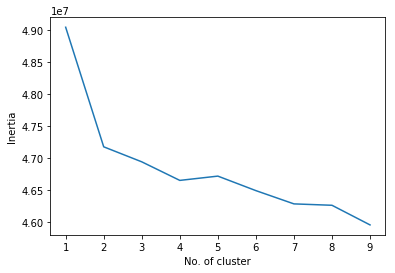

Wall time: 1h 2min 27s


In [149]:
%%time
from sklearn.cluster import KMeans
dict_k = {}
for i in range(1,10):
    clus_tf = KMeans(n_clusters = i)
    clus_tf.fit(X_train_k)
    dict_k[i] = clus_tf.inertia_
plt.plot(list(dict_k.keys()), list(dict_k.values()))
plt.xlabel("No. of cluster")
plt.ylabel("Inertia")
plt.show()

In [150]:
optimal_k = KMeans(n_clusters = 8)
p = optimal_k.fit_predict(X_train_k)

In [160]:
print(len(p))

24520


In [158]:
print(len(list_of_sent))

24520


In [161]:
index = []
for i in range(len(p)):
    if p[i] == 1:
        index.append(i)

In [164]:
print(index[3])

37


In [165]:

text = []
for i in range(len(index)):
    text.append(list_of_sent[index[i]])

In [166]:
t_b = ''
for j in range(len(text)):
    for i in range(len(text[j])):
        t_b = t_b + text[j][i] + ' '

In [173]:
# print(t_b)

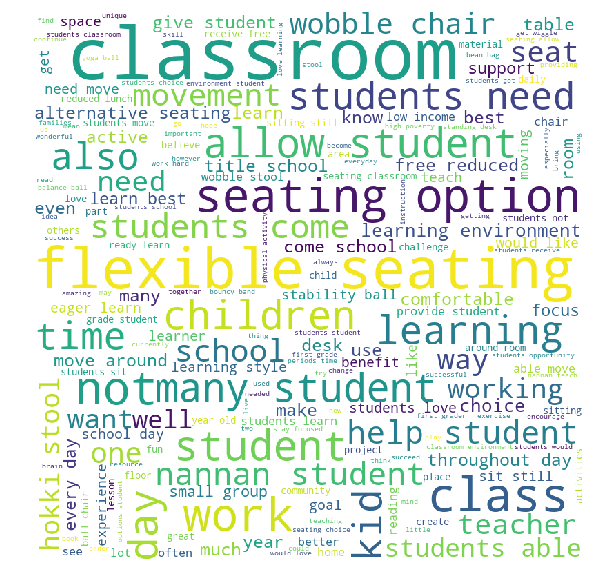

In [177]:
#https://www.geeksforgeeks.org/generating-word-cloud-python/
from wordcloud import WordCloud, STOPWORDS 
import matplotlib.pyplot as plt 
import pandas as pd
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(t_b)
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show()


<h2>2.6 Apply AgglomerativeClustering</h2>

In [180]:
# please write all the code with proper documentation, and proper titles for each subsection
# go through documentations and blogs before you start coding
# first figure out what to do, and then think about how to do.
# reading and understanding error messages will be very much helpfull in debugging your code
# when you plot any graph make sure you use 
    # a. Title, that describes your plot, this will be very helpful to the reader
    # b. Legends if needed
    # c. X-axis label
    # d. Y-axis label
from sklearn.preprocessing import StandardScaler
sc = StandardScaler(with_mean = False)
X_train_agg = sc.fit_transform(X_tr[:5000])

In [181]:
print(X_train_agg.shape)

(5000, 2000)


In [183]:
from sklearn.cluster import AgglomerativeClustering
agg = AgglomerativeClustering(n_clusters = 5)
p = agg.fit_predict(X_train_agg.toarray())

In [204]:
from sklearn.cluster import AgglomerativeClustering

model = AgglomerativeClustering(n_clusters=2).fit(X_train_agg.toarray())

essays = X_train['clean_essays'].values
# Getting all the reviews in different clusters
cluster1 = []
cluster2 = []

for i in range(model.labels_.shape[0]):
    if model.labels_[i] == 0:
        cluster1.append(essays[i])
    else :
        cluster2.append(essays[i])
 
        
# Number of reviews in different clusters
print("No. of essays in Cluster-1 : ",len(cluster1))
print("\nNo. of essays in Cluster-2 : ",len(cluster2))


No. of essays in Cluster-1 :  4947

No. of essays in Cluster-2 :  53


In [205]:
# Three Reviews of cluster 1
count=1
for i in range(3):
    if i < len(cluster1):
        print('essay-%d : \n %s\n'%(count,cluster1[i]))
        count +=1

essay-1 : 
 welcome intellectually gifted classroom i teach culturally diverse group highly motivated inquisitive group youngsters my students caring kind one another full life laughter they come classroom willing heart learn grow they big ambitions big dreams these students bright future they passion learning small amount money receive materials cannot cover cost projects i feel challenge exceptional students they going places lives i want help get will part journey the quest program school advancing students beyond basic classroom knowledge i firm believer students need robotics coding classroom strengthen wave future having apple ipad allow us download apps necessary run dash robot learn coding our old date computers cannot handle necessary robotic apps right i loving students enough use personal ipad help learn new dash robot we starting robotic adventure got first dash robot thanks donors choose desperately need first classroom ipad start new dash yellow brick road nannan

essay-2

In [207]:
# Three Reviews of cluster 2
count=1
for i in range(3):
    if i < len(cluster2):
        print('Essay-%d : \n %s\n'%(count,cluster2[i]))
        count +=1

Essay-1 : 
 as teacher low income school district students faced several challenges classroom despite many challenges face i looking keep things simple provide students creative meaningful learning experiences my students like hands activities group discussions love lots positive attention many raised single parent households receive free lunch based socioeconomic status these things may prevent getting ahead early life may not provide life experiences many us see typical from minute walk door classroom i greet caring smile focus individual needs i may not able control home lives however i certainly control experience school day by creative positive way i hopeful inspire even earliest learners continue path academic excellence my students need science reading materials focus literacy skills writing within science class reading writing not important ela huge part science education well our students use materials explore ability reading researching drawing conclusions introductions new i

In [189]:
model = AgglomerativeClustering(n_clusters=5).fit(X_train_agg.toarray())

essays = X_train['clean_essays'].values
# Getting all the reviews in different clusters
cluster1 = []
cluster2 = []
cluster3 = []
cluster4 = []
cluster5 = []

for i in range(model.labels_.shape[0]):
    if model.labels_[i] == 0:
        cluster1.append(essays[i])
    elif model.labels_[i] == 1:
        cluster2.append(essays[i])
    elif model.labels_[i] == 2:
        cluster3.append(essays[i])
    elif model.labels_[i] == 3:
        cluster4.append(essays[i])
    else :
        cluster5.append(essays[i]) 
        
# Number of reviews in different clusters
print("No. of essays in Cluster-1 : ",len(cluster1))
print("\nNo. of essays in Cluster-2 : ",len(cluster2))
print("\nNo. of essays in Cluster-3 : ",len(cluster3))
print("\nNo. of essays in Cluster-4 : ",len(cluster4))
print("\nNo. of essays in Cluster-5 : ",len(cluster5))

No. of essays in Cluster-1 :  33

No. of essays in Cluster-2 :  4450

No. of essays in Cluster-3 :  23

No. of essays in Cluster-4 :  20

No. of essays in Cluster-5 :  474


In [200]:
# Three Reviews of cluster 2
count=1
for i in range(3):
    if i < len(cluster1):
        print('Essay-%d : \n %s\n'%(count,cluster1[i]))
        count +=1

Essay-1 : 
 as teacher low income school district students faced several challenges classroom despite many challenges face i looking keep things simple provide students creative meaningful learning experiences my students like hands activities group discussions love lots positive attention many raised single parent households receive free lunch based socioeconomic status these things may prevent getting ahead early life may not provide life experiences many us see typical from minute walk door classroom i greet caring smile focus individual needs i may not able control home lives however i certainly control experience school day by creative positive way i hopeful inspire even earliest learners continue path academic excellence my students need science reading materials focus literacy skills writing within science class reading writing not important ela huge part science education well our students use materials explore ability reading researching drawing conclusions introductions new i

In [201]:
# Three Reviews of cluster 2
count=1
for i in range(3):
    if i < len(cluster2):
        print('Review-%d : \n %s\n'%(count,cluster2[i]))
        count +=1

Review-1 : 
 welcome intellectually gifted classroom i teach culturally diverse group highly motivated inquisitive group youngsters my students caring kind one another full life laughter they come classroom willing heart learn grow they big ambitions big dreams these students bright future they passion learning small amount money receive materials cannot cover cost projects i feel challenge exceptional students they going places lives i want help get will part journey the quest program school advancing students beyond basic classroom knowledge i firm believer students need robotics coding classroom strengthen wave future having apple ipad allow us download apps necessary run dash robot learn coding our old date computers cannot handle necessary robotic apps right i loving students enough use personal ipad help learn new dash robot we starting robotic adventure got first dash robot thanks donors choose desperately need first classroom ipad start new dash yellow brick road nannan

Review

In [199]:
# Three Reviews of cluster 2
count=1
for i in range(3):
    if i < len(cluster3):
        print('Essay-%d : \n %s\n'%(count,cluster3[i]))
        count +=1

Essay-1 : 
 as teacher low income high poverty school district i see students faced challenges classroom despite many challenges face i looking keep things simple provide students creative meaningful learning experiences my students vary highly gifted special needs my students creative clever spontaneous they like move love lots positive attention all students receive free lunch based socioeconomic status area these things may prevent getting ahead early life may not provide life experiences many us see typical our bodies not made sitting 8 hours day i teach math social studies many students 4 hours my students beg reasons get move thanks donors choose donations people like able add four standing desks classroom my students love they begged get can help us standing desks lasting health benefits academic achievement expected increase well can help students burn calories learn become active learners classroom we counting help make school year best school year ever nannan

Essay-2 : 
 as 

In [202]:
# Three Reviews of cluster 2
count=1
for i in range(3):
    if i < len(cluster4):
        print('Essay-%d : \n %s\n'%(count,cluster4[i]))
        count +=1

Essay-1 : 
 as fourth grade teacher small rural high poverty school students faced numerous challenges school despite challenges i try provide students creative meaningful learning experiences my students extremely smart creative age hopefully develop love learning these students also want need positive attention many raised single parent households living well poverty level all students school receive free lunch based community socioeconomic status from minute walk door classroom i focus ability growth i may not able control home lives however i certainly control experience school day by creative positive way i instill love learning help children continue path academic excellence my students able select area alternative seating work special seating privileges wobble chairs some students simply able accomplish task oriented assignments options active chair instead cold hard seat my students able develop core sense balance many students lacking sitting hard chairs long school day althou

In [203]:
# Three Reviews of cluster 2
count=1
for i in range(3):
    if i < len(cluster5):
        print('Essay-%d : \n %s\n'%(count,cluster5[i]))
        count +=1

Essay-1 : 
 my students full energy excited learn our class consists 5 6 year old students learn many different ways many students never classroom setting would benefit opportunity move around release wiggles research shown movement learning help students focus reach highest potential i teach title i school 75 students qualify free reduced lunch many students come challenging backgrounds show class day ready learn excited kindergarten i love students believe accomplish goal set this project help students begin reaching goals a variety seating options classroom makes engaging learning environment students given opportunity make choice best suits learning style helps focus my kindergarten students eager learn i want provide best classroom environment help grow succeed flexible seating enable young learners create engage collaborate think learning getting wiggles students choice sit wobble chairs lay rugs stand engage learning giving students choice help become confident comfortable learn

In [209]:
list_of_sent = []
for i in X_train['clean_essays'][:5000]:
    sent = []
    for word in i.split():
        sent.append(word)
    list_of_sent.append(sent)

In [210]:
print(len(list_of_sent))

5000


In [212]:
from sklearn.cluster import AgglomerativeClustering
agg = AgglomerativeClustering(n_clusters = 2)
p = agg.fit_predict(X_train_agg.toarray())

In [214]:
print(len(p))

5000


In [215]:
index = []
for i in range(len(p)):
    if p[i] == 1:
        index.append(i)

In [216]:

text = []
for i in range(len(index)):
    text.append(list_of_sent[index[i]])

In [217]:
t_b = ''
for j in range(len(text)):
    for i in range(len(text[j])):
        t_b = t_b + text[j][i] + ' '

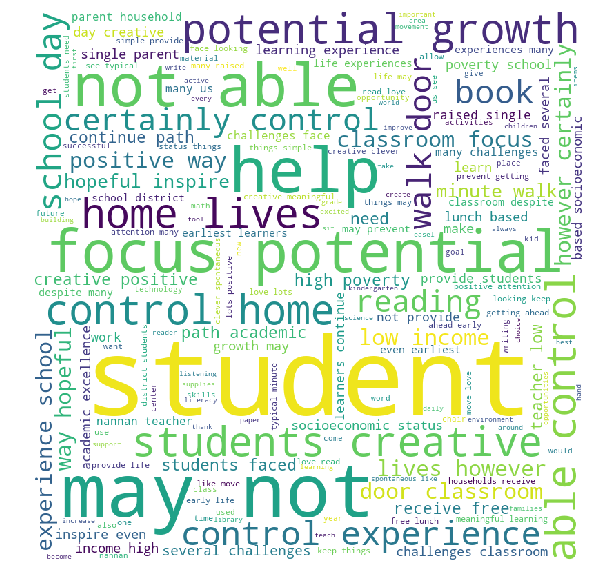

In [218]:
#https://www.geeksforgeeks.org/generating-word-cloud-python/
from wordcloud import WordCloud, STOPWORDS 
import matplotlib.pyplot as plt 
import pandas as pd
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(t_b)
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show()

In [219]:
from sklearn.cluster import AgglomerativeClustering
agg = AgglomerativeClustering(n_clusters = 5)
p = agg.fit_predict(X_train_agg.toarray())

In [221]:
index = []
for i in range(len(p)):
    if p[i] == 4:
        index.append(i)

In [222]:

text = []
for i in range(len(index)):
    text.append(list_of_sent[index[i]])

In [223]:
t_b = ''
for j in range(len(text)):
    for i in range(len(text[j])):
        t_b = t_b + text[j][i] + ' '

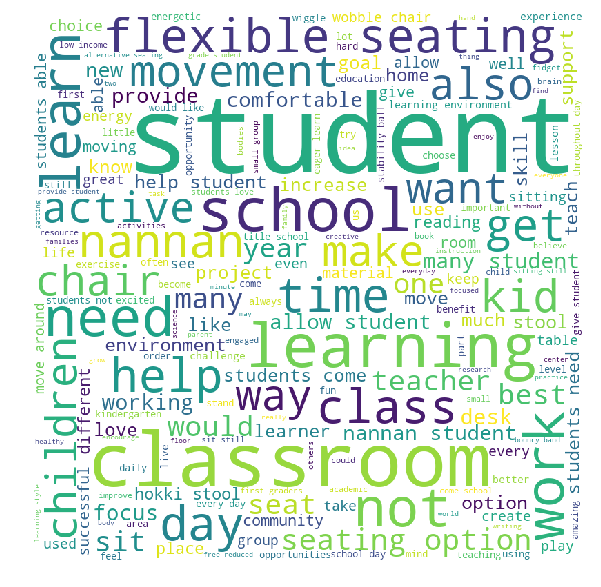

In [224]:
#https://www.geeksforgeeks.org/generating-word-cloud-python/
from wordcloud import WordCloud, STOPWORDS 
import matplotlib.pyplot as plt 
import pandas as pd
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(t_b)
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show()

<h2>2.7 Apply DBSCAN</h2>

In [79]:
# np.where(np.isnan(X_tr['clean_essays']))

In [155]:
# please write all the code with proper documentation, and proper titles for each subsection
# go through documentations and blogs before you start coding
# first figure out what to do, and then think about how to do.
# reading and understanding error messages will be very much helpfull in debugging your code
# when you plot any graph make sure you use 
    # a. Title, that describes your plot, this will be very helpful to the reader
    # b. Legends if needed
    # c. X-axis label
    # d. Y-axis label
from sklearn.preprocessing import StandardScaler
sc = StandardScaler(with_mean = False)
X_train_agg = sc.fit_transform(X_tr[:10000])

In [85]:
# X_train_agg = X_train_agg[np.logical_not(np.isnan(X_train_agg))]

In [66]:
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors
min_point = 100
knn = NearestNeighbors(n_neighbors = min_point)
knn.fit(X_train_agg)
dist , index = knn.kneighbors(X_train_agg)

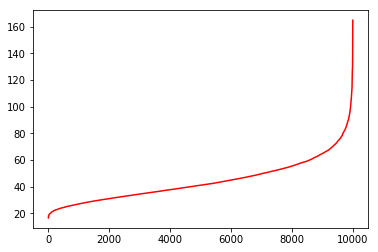

In [67]:
#https://datascience.stackexchange.com/questions/10162/knn-distance-plot-for-determining-eps-of-dbscan
sort = sorted(dist[:,min_point-1])
plt.plot(list(range(1,(X_train_agg.shape[0])+1)),sort,'r-')
plt.show()

In [156]:
db = DBSCAN(eps = 70 , min_samples = 100)
p = db.fit_predict(X_train_agg)

In [157]:
list_of_sent = []
for i in X_train['clean_essays'][:10000]:
    sent = []
    for word in i.split():
        sent.append(word)
    list_of_sent.append(sent)

In [158]:
index = []
for i in range(len(p)):
    if p[i] == 0:
        index.append(i)
print(len(index))

9744


In [159]:
text = []
for i in range(len(index)):
    text.append(list_of_sent[index[i]])

In [160]:
t_b = ''
for j in range(len(text)):
    for i in range(len(text[j])):
        t_b = t_b + text[j][i] + ' '

In [175]:
# print(t_b[3])

In [185]:
# # np.isnan(t_b)
# c=0
t_b=t_b.replace('nannan',' ')

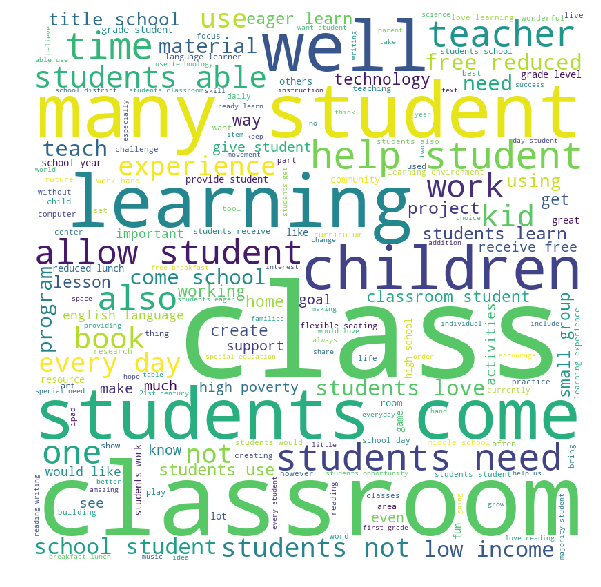

In [186]:
from wordcloud import WordCloud, STOPWORDS 
import matplotlib.pyplot as plt 
import pandas as pd
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(t_b)
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show()

<h1>3. Cocnlusions</h1>
<br> Please write down few lines of your observations on this assignment.

##### We have applied K means, agglomerative & DBSCAN Algorithm on Matrix obtained by BOW with 25k data points. By help of word cloud, 

##### we can interpret what type of word are there in cluster.

##### we need to train one time, and we can get any number of clusters from Agglomerative clustering(Dendograms).

##### All the 3 models are working good for Bag of words.